<a href="https://colab.research.google.com/github/JskifterJ/SMT/blob/main/SLO_midterm_consolidated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Assignment problem: workers - tasks
We are given five workers (numbered 0-4) and four tasks (numbered 0-3) together with the costs of assigning workers to tasks, as shown in the next table. The goal is to assign each worker to at most one task, with no two workers performing the same task, while minimizing the total cost. Since there are more workers than tasks, one worker will not be assigned a task.

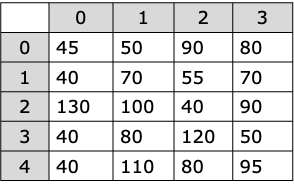

In [ ]:
!pip install ortools
from ortools.linear_solver import pywraplp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In the following code block we declare the function main() that, in order, is composed by the following steps:


*   Declaration and initialization of the cost funtion, number of workers and tasks;
*   Solver declaration;
*   Variable declaration;
*   Constraints logic;
*   Objective function;
*   Storing solver output in the status variable;
*   Print solution.



In [ ]:
def main():

    # Data
    costs = [
        [45, 50, 90, 80],
        [40, 70, 55, 70],
        [130, 100, 40, 90],
        [45, 80, 120, 50],
        [40, 110, 80, 95],
    ]
    num_workers = len(costs)
    num_tasks = len(costs[0])

    # Solver
    # Create the mip solver with the SCIP backend.


    solver = pywraplp.Solver.CreateSolver('CLP')


    # Variables
    # x[i, j] is an array of 0-1 variables, which will be 1
    # if worker i is assigned to task j.

    x = {}
    for i in range(num_workers):
        for j in range(num_tasks):
            x[i, j] = solver.IntVar(0, 1, '')

    # Constraints

    # Each worker is assigned to at most 1 task.
    for i in range(num_workers):
        solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

    # Each task is assigned to exactly one worker.
    for j in range(num_tasks):
        solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

    # Objective

    solver.Minimize(solver.Sum([costs[i][j] * x[i,j] for i in range(num_workers)
                                                  for j in range(num_tasks)]))

    # Solve

    status = solver.Solve()

    # Print solution.
    if status == pywraplp.Solver.OPTIMAL:
        print('Total cost = ', solver.Objective().Value(), '\n')
        for i in range(num_workers):
            for j in range(num_tasks):
                # Test if x[i,j] is 1 (with tolerance for floating point arithmetic).
                if x[i, j].solution_value() > 0.5:
                    print('Worker %d assigned to task %d.  Cost = %d' %
                          (i, j, costs[i][j]))


Lastly, we call the function.

In [ ]:
main()

Total cost =  180.0 

Worker 0 assigned to task 1.  Cost = 50
Worker 1 assigned to task 0.  Cost = 40
Worker 2 assigned to task 2.  Cost = 40
Worker 3 assigned to task 3.  Cost = 50


### 2. Extension of problem 1
There are many versions of the assignment problem, which have additional constraints on the workers or tasks. In this example you are given six workers divided into two teams, and each team can perform at most two tasks.
The workers are divided as follows:

*   Team one: 0, 1, 4
*   Team two: 2, 3, 5


The additional constraints need to be met:
*   Each worker is assigned to at most 1 task
*   Each task is assigned to exactly one worker
*   Worker 0 has to be assigned to either task 2 or 3

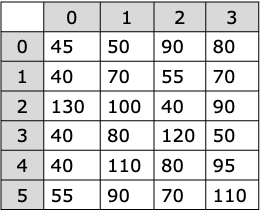

In [ ]:
#!pip install ortools
from __future__ import print_function
from ortools.linear_solver import pywraplp

In [ ]:
def main():
  solver = pywraplp.Solver.CreateSolver('CLP')

  cost = [[45, 50, 90, 80],
        [40, 70, 55, 70],
        [130, 100, 40, 90],
        [45, 80, 120, 50],
        [40, 110, 80, 95],
        [55, 90, 70, 110]]

  team1 = [0, 1, 4]
  team2 = [2, 3, 5]
  team_max = 2

  num_workers = len(cost)
  num_tasks = len(cost[1])

  x = {}
  for i in range(num_workers):
    for j in range(num_tasks):
      x[i, j] = solver.IntVar(0, 1, '')

  # Objective
  solver.Minimize(solver.Sum([cost[i][j] * x[i,j] for i in range(num_workers)
                                                  for j in range(num_tasks)]))

  # Constraints


  # Each worker is assigned to at most 1 task.
  for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

  # Each task is assigned to exactly one worker.
  for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

  # Worker 0 has to be assigned to either task 2 or 3
  solver.Add(solver.Sum(x[0, j] for j in [2, 3]) == 1)


  solver.Add(solver.Sum([x[i,j] for i in team1 for j in range(num_tasks)]) <= 2)
  solver.Add(solver.Sum([x[i,j] for i in team2 for j in range(num_tasks)]) <= 2)


  #solve the model
  sol = solver.Solve()

  print('Total cost = ', solver.Objective().Value())
  print()
  for i in range(num_workers):
    for j in range(num_tasks):
      if x[i, j].solution_value() > 0:
        print('Worker %d assigned to task %d.  Cost = %d' % (
              i,
              j,
              cost[i][j]))

  print()
  print("Time = ", solver.WallTime(), " milliseconds")

In [ ]:
main()

Total cost =  235.0

Worker 0 assigned to task 3.  Cost = 80
Worker 1 assigned to task 1.  Cost = 70
Worker 2 assigned to task 2.  Cost = 40
Worker 3 assigned to task 0.  Cost = 45

Time =  6  milliseconds


# Session 1 - Profit optimization

In [ ]:
# Solver
solver = pywraplp.Solver.CreateSolver('CBC')

# Variables
x = solver.IntVar(0, solver.infinity(), 'x')
y = solver.IntVar(0, solver.infinity(), 'y')

In [ ]:
solver.Add(240*x + 144*y <= 24000)
solver.Add(60*x + 60*y <= 7680)

solver.Maximize (300*x + 240*y)

# Solve the system.
status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('A =', x.solution_value())
    print('B =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

    print('\nAdvanced usage:')
    print('Problem solved in %f milliseconds' % solver.wall_time())
    print('Problem solved in %d iterations' % solver.iterations())
    print('Problem solved in %d branch-and-bound nodes' % solver.nodes())

Solution:
Objective value = 34200.0
A = 58.0
B = 70.0


# Session 2 -  Bike sharing truck servicing optimization

In [ ]:
from ortools.linear_solver import pywraplp

# Create the data
stations = ["A", "B", "C", "D"]
num_stations = len(stations)
capacity = [12, 10, 8, 15]
demand = [5, 10, 8, 3]
bikes = [3, 8, 6, 9]
cost = [
  [0, 2, 3, 4],
  [2, 0, 2, 3],
  [3, 2, 0, 2],
  [4, 3, 2, 0]
]
truck_capacity = 10


# Create the solver
solver = pywraplp.Solver.CreateSolver("SCIP")

# Define the decision variables
x = {}
for i in range(num_stations):
    for j in range(num_stations):
        if i != j:
            x[i, j] = solver.IntVar(0, solver.infinity(), f'x_{stations[i]}_{stations[j]}')

# Define the objective function
solver.Minimize(solver.Sum(cost[i][j] * x[i, j] for i in range(num_stations) for j in range(num_stations) if i != j))

# Add capacity constraints
for i in range(num_stations):
    solver.Add(solver.Sum(x[i, j] for j in range(num_stations) if j != i) <= bikes[i])
    solver.Add(solver.Sum(x[j, i] for j in range(num_stations) if j != i) <= capacity[i])

# Add demand constraints
for i in range(num_stations):
    solver.Add(solver.Sum(x[j, i] for j in range(num_stations) if j != i) - solver.Sum(x[i, j] for j in range(num_stations) if j != i) >= demand[i]- bikes[i])

# Add truck capacity constraint
solver.Add(solver.Sum(x[i, j] for i in range(num_stations) for j in range(num_stations) if i != j) <= truck_capacity)

# Solve the problem
status = solver.Solve()

# Print the solution
if status == pywraplp.Solver.OPTIMAL:
    print('Total cost =', solver.Objective().Value())
    for i in range(num_stations):
        for j in range(num_stations):
            if i != j:
                print(f'x_{stations[i]}_{stations[j]} =', x[i, j].solution_value())
else:
    print('The problem does not have an optimal solution.')



Total cost = 18.0
x_A_B = 0.0
x_A_C = 0.0
x_A_D = 0.0
x_B_A = 0.0
x_B_C = 0.0
x_B_D = 0.0
x_C_A = 0.0
x_C_B = 0.0
x_C_D = 0.0
x_D_A = 2.0
x_D_B = 2.0
x_D_C = 2.0


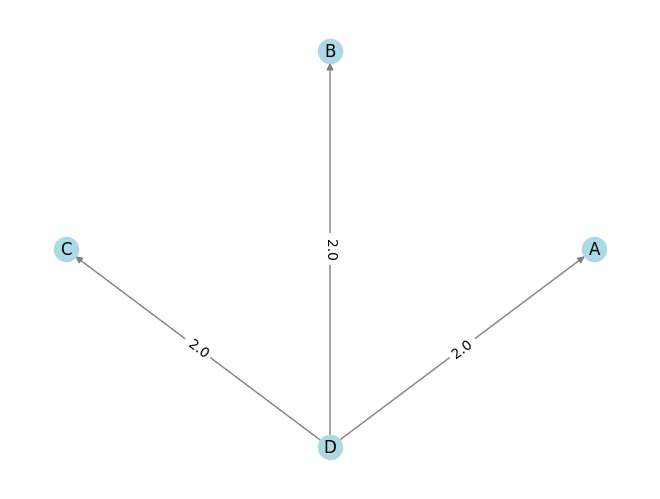

In [ ]:
# Import networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph
G = nx.DiGraph()

# Add nodes for each station
for i in range(num_stations):
    G.add_node(stations[i])

# Add edges for each bike movement
for i in range(num_stations):
    for j in range(num_stations):
        if i != j and x[i, j].solution_value() > 0:
            G.add_edge(stations[i], stations[j], weight=x[i, j].solution_value())

# Draw the network graph with labels and edge weights
pos = nx.circular_layout(G) # You can choose other layouts as well
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


# Session 3 - TSP (i): Optimal Depot Location

Scenario:
You are a group of students enrolled in an operations research course. Your latest assignment involves analyzing the logistics organization of Colissimo, a parcel delivery service operating in France. Colissimo wants to improve its deliveries between its various post offices in Paris, particularly in the 10th arrondissement, and is considering opening a new depot in the area. Your task is to determine the best location for this new depot among three options provided by Colissimo.

Objective:
Your objective is to minimize the traveled distance for Colissimo's delivery routes while also considering potential reductions in CO2 emissions to align with Colissimo's ecological responsibilities.

Data:
You have been provided with data describing the locations of post offices in Paris, including their addresses and geographic coordinates. Additionally, you have a distance matrix calculated based on driving distances between these locations, as well as information about the three possible depot locations: Métro Jean Jaurès, Station de métro "Couronnes," and Gare Paris Saint-Lazare.

In [ ]:
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2


# TSP with 11 locations

def create_data_model():
    """Stores the data for the problem."""
    # address: 0: 38 Boulevard de Strasbourg, 1: 169 Rue du Faubourg St. Denis, 2: 56 Rue Rene Boulanger, 3: 228 Rue du Faubourg St. Martin, 4: 18 Boulevard de bonne nouvelle, 5: 46 Rue de Sambre et Meuse, 6: 11 Rue Leon Jouhaux, 7: 158 Rue du Faubourg St. Martin, 8: 2 square Alban Satragne, 9: 8 Rue de Dunkerque, 10: 4 Rue du 8 Mai 1945, 11: depot 1
    data = {}
    data['distance_matrix'] = [
        [0, 850, 1000, 1300, 1300, 2300, 1400, 650, 550, 1100, 550, 2300],
        [2700, 0, 2900, 1500, 3100, 2500, 3700, 1900, 2300, 260, 2000, 2000],
        [1100, 1400, 0, 1600, 1700, 2800, 1200, 1100, 1100, 1700, 1100, 2700],
        [1200, 1500, 1600, 0, 1900, 1500, 2300, 550, 1100, 1000, 700, 1100],
        [1300, 3100, 1400, 1900, 0, 3000, 1200, 1400, 1200, 1700, 1200, 3000],
        [2300, 1800, 2900, 1200, 3100, 0, 2100, 1700, 2400, 2100, 1900, 1900],
        [2000, 2700, 2500, 2100, 1900, 2000, 0, 2200, 2200, 3000, 2200, 2800],
        [750, 950, 1100, 250, 1300, 1600, 1800, 0, 600, 1200, 160, 1600],
        [550, 2300, 1100, 1100, 1200, 2300, 1500, 700, 0, 1200, 550, 2300],
        [1200, 300, 1500, 1100, 1600, 2400, 2200, 950, 650, 0, 800, 1900],
        [1300, 1400, 1600, 1400, 1900, 2400, 2300, 800, 1100, 1600 ,0, 2400],
        [1900, 1100, 2100, 550, 2400, 1200, 2900, 1100, 1700, 1400, 1300, 0]]


    data['num_vehicles'] = 1

    # The index of the depot, the location where all vehicles start and end their routes.
    data['depot'] = 0
    return data

def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} m'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]


data = create_data_model()

manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])

routing = pywrapcp.RoutingModel(manager)

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)


solution = routing.SolveWithParameters(search_parameters)

if solution:
        print_solution(manager, routing, solution)



Objective: 11920 m
Route for vehicle 0:
 3 -> 7 -> 10 -> 1 -> 9 -> 8 -> 0 -> 4 -> 2 -> 6 -> 5 -> 11 -> 3



# Seesion 3 - TSP: Delivery route optimization (incl. math)

Problem description:

A delivery company operates a single truck that delivers packages to various locations in a city. The company wants to minimize the total cost of the delivery route, which includes the distance traveled, the fuel consumption, and the carbon emissions. The company also wants to promote sustainability and reduce its environmental impact.

The truck has a fixed capacity of 100 packages, and each location has a demand of 1 to 10 packages. The truck starts and ends its route at the depot, which is located at the center of the city. The locations are randomly distributed within a 10 km by 10 km area.

The distance between any two locations is calculated using the Euclidean formula. The fuel consumption and the carbon emission depend on the distance, the speed, the road conditions, and the truck characteristics. For simplicity, we assume that the fuel consumption is proportional to the distance, and the carbon emission is proportional to the fuel consumption.

The company wants to find the optimal route for the truck that visits all the locations exactly once and returns to the depot, while satisfying the capacity and demand constraints, and minimizing the total cost.

Mathematical model:

Let n be the number of locations, including the depot. Let d[i][j] be the distance between location i and location j, for i, j = 0, ..., n-1. Let f[i][j] be the fuel consumption when traveling from location i to location j, for i, j = 0, ..., n-1. Let c[i][j] be the carbon emission when traveling from location i to location j, for i, j = 0, ..., n-1. Let w1, w2, and w3 be the weights for the distance, the fuel consumption, and the carbon emission, respectively. Let q[i] be the demand of location i, for i = 0, ..., n-1. Let Q be the capacity of the truck.

The decision variables are:

- x[i][j]: a binary variable that indicates whether the truck travels from location i to location j, for i, j = 0, ..., n-1.
- y[i]: a continuous variable that indicates the position of location i in the route, for i = 0, ..., n-1.

The objective function is:

$$\min \sum_{i=0}^{n-1} \sum_{j=0}^{n-1} (w_1 d_{ij} + w_2 f_{ij} + w_3 c_{ij}) x_{ij}$$

The constraints are:

- Flow conservation: for each location i, the truck can enter and leave at most once.

$$\sum_{j=0}^{n-1} x_{ij} = 1, \quad \forall i = 0, ..., n-1$$
$$\sum_{i=0}^{n-1} x_{ij} = 1, \quad \forall j = 0, ..., n-1$$

- Subtour elimination: for each pair of locations i and j, the position of location i in the route must be smaller than the position of location j if the truck travels from i to j.

$$y_i + 1 \leq y_j + n (1 - x_{ij}), \quad \forall i, j = 1, ..., n-1, i \neq j$$

- Depot constraints: the position of the depot in the route must be 0.

$$y_0 = 0$$

- Capacity and demand constraints: the total demand of the locations visited by the truck must not exceed the capacity of the truck.

$$\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} q_j x_{ij} \leq Q$$


In [ ]:
# Import the libraries
from ortools.constraint_solver import pywrapcp
from ortools.linear_solver import pywraplp
import numpy as np
import math

# Define the data

# Number of locations, including depot
num_locations = 10
# Depot location
depot = 0
# Number of vehicles
num_vehicles = 1
# Capacity of the truck
capacity = 100
# Demands of the locations
demands = np.random.randint(1, 11, size=num_locations)
# Depot has no demand
demands[depot] = 0
# Size of the area
area_size = 10
# Coordinates of the locations
locations = np.random.uniform(0, area_size, size=(num_locations, 2))
# Distance matrix
distance_matrix = np.zeros((num_locations, num_locations))
# Fuel consumption matrix
fuel_matrix = np.zeros((num_locations, num_locations))
# Carbon emission matrix
carbon_matrix = np.zeros((num_locations, num_locations))
# Weight for the distance
distance_weight = 1
# Weight for the fuel consumption
fuel_weight = 2
# Weight for the carbon emission
carbon_weight = 3
# Factor for the fuel consumption
fuel_factor = 0.1
# Factor for the carbon emission
carbon_factor = 2.4

# Calculate the distance, the fuel consumption, and the carbon emission matrices
for i in range(num_locations):
    for j in range(num_locations):
        if i != j:
            distance_matrix[i][j] = math.sqrt((locations[i][0] - locations[j][0])**2 + (locations[i][1] - locations[j][1])**2)
            fuel_matrix[i][j] = distance_matrix[i][j] * fuel_factor
            carbon_matrix[i][j] = fuel_matrix[i][j] * carbon_factor

# Create the routing model
manager = pywrapcp.RoutingIndexManager(num_locations, num_vehicles, depot)
routing = pywrapcp.RoutingModel(manager)

# Define the cost function
def cost_function(from_index, to_index):
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return int(distance_weight * distance_matrix[from_node][to_node] + fuel_weight * fuel_matrix[from_node][to_node] + carbon_weight * carbon_matrix[from_node][to_node])

# Set the arc cost evaluator
transit_callback_index = routing.RegisterTransitCallback(cost_function)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# Add the capacity and demand constraints
def demand_callback(from_index):
    # Returns the demand of the node.
    # Convert from routing variable Index to demands NodeIndex.
    from_node = manager.IndexToNode(from_index)
    return demands[from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    [capacity],  # vehicle maximum capacities
    True,  # start cumul to zero
    'Capacity')

# Set the search parameters
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.FromSeconds(1)

# Solve the problem
solution = routing.SolveWithParameters(search_parameters)

# Print the solution
if solution:
    print('Total cost = {}'.format(solution.ObjectiveValue()))
    print('Route for vehicle 0:')
    index = routing.Start(0)
    route_distance = 0
    route_fuel = 0
    route_carbon = 0
    while not routing.IsEnd(index):
        node = manager.IndexToNode(index)
        next_node = manager.IndexToNode(solution.Value(routing.NextVar(index)))
        route_distance += distance_matrix[node][next_node]
        route_fuel += fuel_matrix[node][next_node]
        route_carbon += carbon_matrix[node][next_node]
        print('{} -> '.format(node), end='')
        index = solution.Value(routing.NextVar(index))
    node = manager.IndexToNode(index)
    print(node)
    print('Route distance = {}'.format(route_distance))
    print('Route fuel consumption = {}'.format(route_fuel))
    print('Route carbon emission = {}'.format(route_carbon))
else:
    print('No solution found')


Total cost = 53
Route for vehicle 0:
0 -> 2 -> 3 -> 8 -> 1 -> 9 -> 5 -> 6 -> 7 -> 4 -> 0
Route distance = 29.065564108790667
Route fuel consumption = 2.906556410879067
Route carbon emission = 6.97573538610976


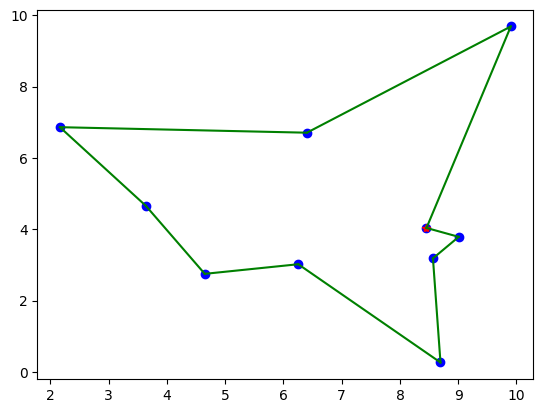

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the locations
plt.scatter(locations[:, 0], locations[:, 1], c='b')
# Plot the depot
plt.plot(locations[depot, 0], locations[depot, 1], c='r', marker='*')
# Plot the route
index = routing.Start(0)
while not routing.IsEnd(index):
    node = manager.IndexToNode(index)
    next_node = manager.IndexToNode(solution.Value(routing.NextVar(index)))
    # Draw a line from node to next_node
    plt.plot([locations[node, 0], locations[next_node, 0]], [locations[node, 1], locations[next_node, 1]], c='g')
    index = solution.Value(routing.NextVar(index))
# Show the plot
plt.show()


# Session 4 - CVRP (capacitated)

**Problem Description**

The city is divided into several districts, each with a waste collection point. The waste management company has a fleet of garbage trucks, all starting from the same depot. Each truck has a maximum capacity, and each collection point generates a certain amount of waste daily. The distances between all points (depot and collection points) are known. The objective is to find the optimal routes for the trucks to collect all waste, minimizing the total distance traveled, and hence, fuel consumption and CO2 emissions.

**Mathematical Model**

This problem can be modeled as a Capacitated Vehicle Routing Problem (CVRP). The main components of the model are:

**Variables**: Binary variables x[i,j,k] (1 if truck k travels from point i to point j, 0 otherwise) and continuous variables y[i,k] representing the load of truck k after visiting point i.

**Objective function**: Minimize the total distance traveled by all trucks, which is the sum of the distances between points i and j for all trucks k if they travel that route.

**Constraints**: Each collection point is visited exactly once by exactly one truck. Each truck starts and ends its route at the depot. The total waste collected by each truck does not exceed its capacity. Subtour elimination constraints to prevent trucks from making unnecessary detours.

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536],
        [548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084],
        [776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400],
        [696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232],
        [582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118],
        [274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582],
        [502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354],
        [194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730],
        [308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 616],
        [194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342],
        [536, 1084, 400, 1232, 1118, 582, 354, 730, 616, 342, 0]
    ]
    data['demands'] = [0, 18, 26, 31, 42, 15, 21, 12, 16, 29, 23]
    data['vehicle_capacities'] = [100, 100, 100, 100]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data

def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = f'Route for vehicle {vehicle_id}:\n'
        route_distance = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            next_node_index = manager.IndexToNode(solution.Value(routing.NextVar(index)))
            route_distance += routing.GetArcCostForVehicle(node_index, next_node_index, vehicle_id)
            plan_output += f' {node_index} -> '
            index = solution.Value(routing.NextVar(index))
        node_index = manager.IndexToNode(index)
        plan_output += f'{node_index}\n'
        plan_output += f'Distance of the route: {route_distance}m\n'
        print(plan_output)


def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        return data['distance_matrix'][manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        return data['demands'][manager.IndexToNode(from_index)]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data['vehicle_capacities'],  # vehicle maximum capacities
        True,  # start cumul to zero
        'Capacity')

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == '__main__':
    main()

Route for vehicle 0:
 0 ->  9 ->  10 ->  2 ->  6 -> 0
Distance of the route: 1712m

Route for vehicle 1:
 0 ->  1 ->  3 ->  4 -> 0
Distance of the route: 1552m

Route for vehicle 2:
 0 ->  8 ->  5 ->  7 -> 0
Distance of the route: 1004m

Route for vehicle 3:
 0 -> 0
Distance of the route: 0m



## Planzer: Optimizing distribution routes



In [ ]:
!pip install ortools

In [ ]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Data multiplied by a factor of 10 to avoid non-integer numbers
    data['distance_matrix'] = [
        [0, 8, 37, 750, 1700, 247, 2890, 2910, 2750, 2990, 2620, 2650],
        [8, 0, 7, 644, 1590, 200, 2870, 2790, 2660, 2880, 2510, 2550],
        [37, 7, 0, 638, 1580, 193, 2750, 2780, 2650, 2790, 2510, 2540],
        [750, 644, 638, 0, 1080, 488, 2240, 2280, 2120, 2250, 2000, 2020],
        [1700, 1590, 1580, 1080, 0, 1430, 1250, 1280, 1130, 1260, 979, 1010],
        [247, 200, 193, 488, 1430, 0, 2620, 2660, 2500, 2640, 2360, 2390],
        [2890, 2870, 2750, 2240, 1250, 2620, 0, 114, 514, 16, 837, 884],
        [2910, 2790, 2780, 2280, 1280, 2660, 114, 0, 632, 118, 887, 918],
        [2750, 2660, 2650, 2120, 1130, 2500, 514, 632, 0, 521, 978, 1010],
        [2990, 2880, 2790, 2250, 1260, 2640, 16, 118, 521, 0, 945, 976],
        [2620, 2510, 2510, 2000, 979, 2360, 837, 887, 978, 945, 0, 31],
        [2650, 2550, 2540, 2020, 1010, 2390, 884, 918, 1010, 976, 31, 0]
    ]
    data['demands'] = [0, 270, 37, 463, 150, 150, 879, 229, 316, 1875, 712, 225]
    data['vehicle_capacities'] = [1875, 1875, 1875]
    data['num_vehicles'] = 3
    data['depot'] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}km\n'.format(route_distance/10)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}km'.format(total_distance/10))
    print('Total load of all routes: {}'.format(total_load))


def main():
    """Solve the CVRP problem."""

    ## TODO: Complete here


main()



Route for vehicle 0:
 0 Load(0) ->  9 Load(1875) ->  0 Load(1875)
Distance of the route: 598.0km
Load of the route: 1875

Route for vehicle 1:
 0 Load(0) ->  2 Load(37) ->  4 Load(187) ->  7 Load(416) ->  6 Load(1295) ->  8 Load(1611) ->  0 Load(1611)
Distance of the route: 627.5km
Load of the route: 1611

Route for vehicle 2:
 0 Load(0) ->  5 Load(150) ->  3 Load(613) ->  11 Load(838) ->  10 Load(1550) ->  1 Load(1820) ->  0 Load(1820)
Distance of the route: 530.4km
Load of the route: 1820

Total distance of all routes: 1755.9km
Total load of all routes: 5306


# Session 5 - BPP and Crop planning

Bin number 0
  Items packed: [0, 1, 2]
  Total weight: 97

Bin number 1
  Items packed: [3, 4, 5]
  Total weight: 99

Bin number 2
  Items packed: [6, 7]
  Total weight: 84

Bin number 3
  Items packed: [8, 9, 10]
  Total weight: 90


Number of bins used: 4
Time =  17  milliseconds


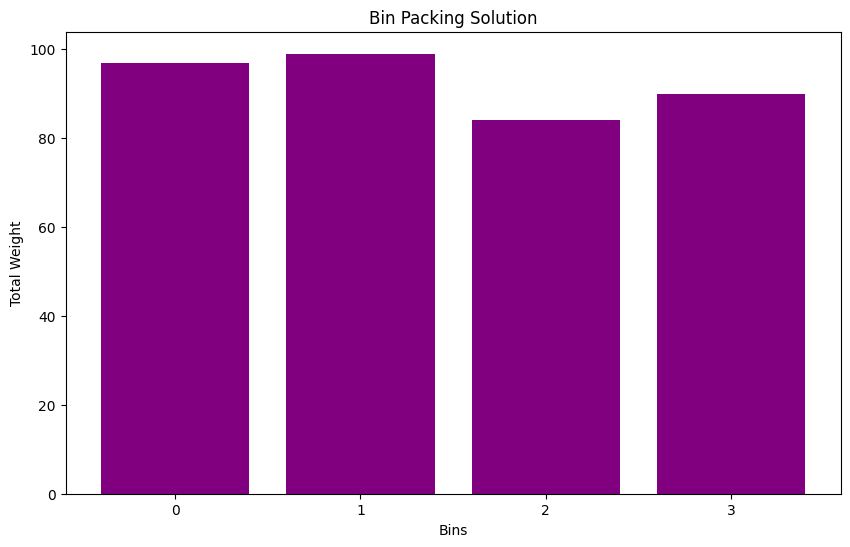

In [ ]:
from ortools.linear_solver import pywraplp


def create_data_model():
    """Create the data for the example."""
    data = {}
    weights = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]
    data["weights"] = weights
    data["items"] = list(range(len(weights)))
    data["bins"] = data["items"]
    data["bin_capacity"] = 100
    return data



def main():
    data = create_data_model()

    # Create the mip solver with the SCIP backend.
    solver = pywraplp.Solver.CreateSolver("SCIP")

    if not solver:
        return

    # Variables
    # x[i, j] = 1 if item i is packed in bin j.
    x = {}
    for i in data["items"]:
        for j in data["bins"]:
            x[(i, j)] = solver.IntVar(0, 1, "x_%i_%i" % (i, j))

    # y[j] = 1 if bin j is used.
    y = {}
    for j in data["bins"]:
        y[j] = solver.IntVar(0, 1, "y[%i]" % j)

    # Constraints
    # Each item must be in exactly one bin.
    for i in data["items"]:
        solver.Add(sum(x[i, j] for j in data["bins"]) == 1)

    # The amount packed in each bin cannot exceed its capacity.
    for j in data["bins"]:
        solver.Add(
            sum(x[(i, j)] * data["weights"][i] for i in data["items"])
            <= y[j] * data["bin_capacity"])

    # Objective: minimize the number of bins used.
    solver.Minimize(solver.Sum([y[j] for j in data["bins"]]))

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0
        for j in data["bins"]:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data["items"]:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data["weights"][i]
                if bin_items:
                    num_bins += 1
                    print("Bin number", j)
                    print("  Items packed:", bin_items)
                    print("  Total weight:", bin_weight)
                    print()
        print()
        print("Number of bins used:", num_bins)
        print("Time = ", solver.WallTime(), " milliseconds")
    else:
        print("The problem does not have an optimal solution.")


    plot_bin_packing_solution(data, x, y)


if __name__ == "__main__":
    main()


## Crop planning optimization

Optimal solution found
Total profit: 17500.0 euros
Crop plan:
wheat: 9 hectares
corn: 35 hectares
rice: 10 hectares
potato: 10 hectares
carrot: 10 hectares


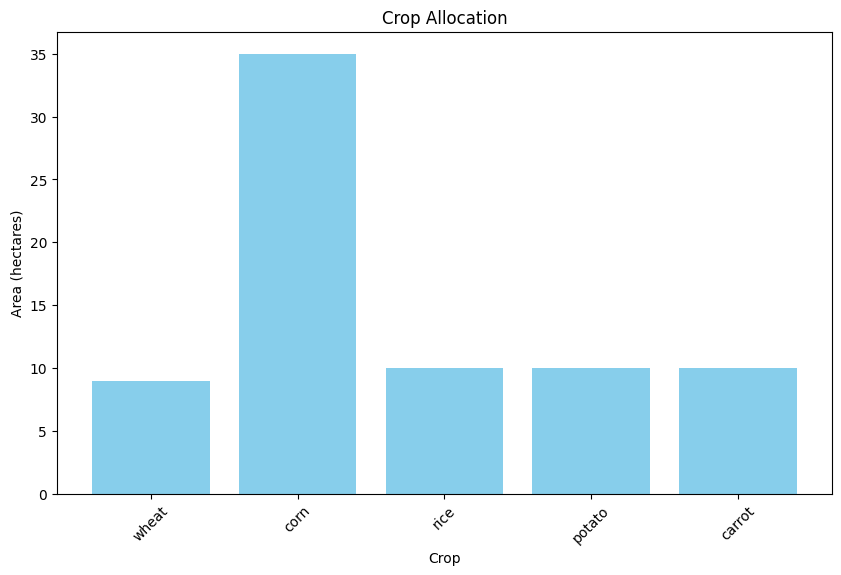

In [ ]:
# Import the libraries
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Create the data
data = {}
# The names of the crops to be planted
data['crops'] = ['wheat', 'corn', 'rice', 'potato', 'carrot']
# The profit per hectare of each crop (in euros)
data['profit'] = [200, 300, 250, 150, 100]
# The water requirement per hectare of each crop (in cubic meters)
data['water'] = [500, 600, 700, 400, 300]
# The number of crops
data['num_crops'] = len(data['crops'])
# The total area available for planting (in hectares)
data['area'] = 100
# The total water available for irrigation (in cubic meters)
data['water_budget'] = 40000
# The minimum and maximum area fraction for each crop (as percentage)
data['min_fraction'] = [10, 10, 10, 10, 10]
data['max_fraction'] = [40, 40, 40, 40, 40]

# Declare the MIP solver
solver = pywraplp.Solver.CreateSolver('SCIP')

# Create the variables
# x[i] = the area planted with crop i (in hectares)
x = {}
for i in range(data['num_crops']):
  x[i] = solver.NumVar(10, data['area'], f'x_{i}')

# Define the constraints
# The total area planted cannot exceed the available area
solver.Add(sum(x[i] for i in range(data['num_crops'])) <= data['area'])

# The total water used for irrigation cannot exceed the available water
solver.Add(sum(x[i] * data['water'][i] for i in range(data['num_crops'])) <= data['water_budget'])

# The area fraction for each crop must be within the specified percentage range defined by
# data['min_fraction'] and data['max_fraction']
for i in range(data['num_crops']):
  solver.Add(x[i] >= data['min_fraction'][i] / 100 * data['area'])
  solver.Add(x[i] <= data['max_fraction'][i] / 100 * data['area'])

# Define the objective
# Maximize the total profit
solver.Maximize(sum(x[i] * data['profit'][i] for i in range(data['num_crops'])))

# Solve the problem and print the solution
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
  print('Optimal solution found')
  print(f'Total profit: {solver.Objective().Value()} euros')
  print('Crop plan:')
  for i in range(data['num_crops']):
    print(f'{data["crops"][i]}: {int(x[i].solution_value())} hectares')
else:
  print('The problem does not have an optimal solution')


# Store the solution
solution = {data['crops'][i]: int(x[i].solution_value()) for i in range(data['num_crops'])}

# Plot the solution
plt.figure(figsize=(10, 6))
plt.bar(solution.keys(), solution.values(), color='skyblue')
plt.title('Crop Allocation')
plt.xlabel('Crop')
plt.ylabel('Area (hectares)')
plt.xticks(rotation=45)
plt.show()

# Session 6 - FLP

## P-median

In [ ]:
from __future__ import print_function
from ortools.sat.python import cp_model as cp
import matplotlib.pyplot as plt

def plot_assignment(customers, warehouses, x, solver):
    num_customers = len(customers)
    num_warehouses = len(warehouses)
    assigned = [[solver.Value(x[c, w]) for w in warehouses] for c in customers]

    plt.imshow(assigned, cmap='Blues', interpolation='nearest')
    plt.xticks(range(num_warehouses), ['W {}'.format(w) for w in warehouses])
    plt.yticks(range(num_customers), ['C {}'.format(c) for c in customers])
    plt.xlabel('Warehouses')
    plt.ylabel('Customers')
    plt.title('Customer-Warehouse Assignment')
    plt.colorbar(label='Assignment')
    plt.show()

z: 890
open: [1, 0, 1, 1]
1 0 0 0 
1 0 0 0 
0 0 1 0 
0 0 1 0 
0 0 0 1 
0 0 0 1 



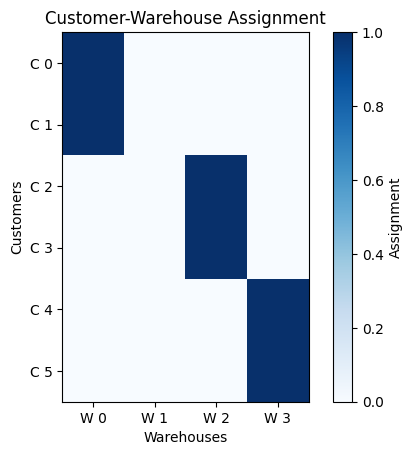

WallTime: 0.010515352


In [ ]:
def main():
    # Model
    model = cp.CpModel()

    # Data declaration
    p = 3
    num_customers = 6
    customers = list(range(num_customers))
    num_warehouses = 4
    warehouses = list(range(num_warehouses))
    demand = [100, 80, 80, 70, 20, 30]
    distance = [[2, 10, 50, 20],
                [2, 10, 52, 30],
                [50, 60, 3, 10],
                [40, 60, 1, 18],
                [30, 20, 10, 5],
                [15, 30, 20, 4]
                ]

    # Variable declaration
    open = [model.NewIntVar(0, 1, 'open[%i]' % w) for w in warehouses]
    x = {}
    for c in customers:
        for w in warehouses:
            x[c, w] = model.NewIntVar(0, 1, 'x[%i,%i]' % (c, w))

    z = model.NewIntVar(0, 1000, 'z')

    # Constraints
    model.Add(z == sum([demand[c] * distance[c][w] * x[c, w] for c in customers for w in warehouses]))

    for c in customers:
        model.Add(sum([x[c, w] for w in warehouses]) == 1)


    model.Add(sum(open) == p)
    for c in customers:
        for w in warehouses:
            model.Add(x[c, w] <= open[w])

    # Objective function
    model.Minimize(z)

    # Model solution
    solver = cp.CpSolver()
    status = solver.Solve(model)

    if status == cp.OPTIMAL:
        print('z:', solver.Value(z))
        print('open:', [solver.Value(open[w]) for w in warehouses])
        for c in customers:
            for w in warehouses:
                print(solver.Value(x[c, w]), end=' ')
            print()
        print()

        plot_assignment(customers, warehouses, x, solver)

    print('WallTime:', solver.WallTime())

if __name__ == '__main__':
    main()

## Set-covering

In [ ]:
"""
  Set covering in Google CP Solver.
  Given 9 Swiss cities and the distance matrix between them, decide where to open warehouses
   to be able to serve all the cities within 120km. We want to minimize the number of warehouses to open.
"""
from __future__ import print_function
from ortools.sat.python import cp_model as cp


def main(unused_argv):
    model = cp.CpModel()

    # data
    min_distance = 120
    num_cities = 9
    #cities: 0: Lausanne, 1: Geneva, 2: Zurich, 3: Bern, 4: Lugano, 5: Luzern, 6: Basel, 7: St. Gallen, 8: Chur

    distance = [
        [0, 64, 229, 109, 378, 110, 201, 304, 346],
        [64, 0, 280, 161, 370, 266, 253, 360, 398],
        [229, 280, 0, 124, 205, 53, 86, 86, 120],
        [109, 161, 124, 0, 277, 110, 96, 204, 241],
        [378, 370, 205, 277, 0, 167, 262, 248, 146],
        [110, 266, 53, 110, 167, 0, 97, 144, 142],
        [201, 253, 86, 96, 262, 97, 0, 170, 204],
        [304, 360, 86, 204, 248, 144, 170, 0, 104],
        [346, 398, 120, 241, 146, 142, 204, 104, 0],
    ]


    # declare variables
    open = [model.NewIntVar(0, 1, "x[%i]" % i) for i in range(num_cities)]
    z = model.NewIntVar(0, num_cities, "z")

    # objective to minimize
    model.Add(z == sum(x))


    # constraints

    # ensure that all cities are covered
    for i in range(num_cities):
        model.Add(sum([x[j] for j in range(num_cities) if distance[i][j] <= min_distance]) >= 1)

    model.Minimize(z)

    # solution and search
    solver = cp.CpSolver()
    status = solver.Solve(model)

    if status == cp.OPTIMAL:
        print("z:", solver.Value(z))
        print("x:", [solver.Value(x[i]) for i in range(num_cities)])

    print("NumConflicts:", solver.NumConflicts())
    print("NumBranches:", solver.NumBranches())

if __name__ == "__main__":
  main("cp sample")

z: 3
x: [1, 0, 1, 0, 1, 0, 0, 0, 0]
NumConflicts: 0
NumBranches: 0


## Facility location impact problem

In [ ]:
from ortools.linear_solver import pywraplp

def solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact):
    num_facilities = len(locations)
    num_customers = len(customers)

    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Variables
    open_vars = [solver.IntVar(0, 1, 'open[%d]' % i) for i in range(num_facilities)]
    assign_vars = [[solver.IntVar(0, 1, 'assign[%d,%d]' % (i, j)) for j in range(num_customers)] for i in range(num_facilities)]

    # Objective: minimize total costs
    solver.Minimize(solver.Sum(opening_costs[i] * open_vars[i] for i in range(num_facilities)) +
                    solver.Sum(transportation_costs[i][j] * assign_vars[i][j] for i in range(num_facilities) for j in range(num_customers)) +
                    solver.Sum(environmental_impact[i] * open_vars[i] for i in range(num_facilities)))

    # Constraints:
    # 1. Each customer must be assigned to exactly one facility
    for j in range(num_customers):
        solver.Add(solver.Sum(assign_vars[i][j] for i in range(num_facilities)) == 1)

    # 2. Capacity constraint for each facility
    for i in range(num_facilities):
        solver.Add(solver.Sum(demand[j] * assign_vars[i][j] for j in range(num_customers)) <= capacity[i] * open_vars[i])

    # Solve the problem
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        total_cost = solver.Objective().Value()
        assignment = [[assign_vars[i][j].solution_value() for j in range(num_customers)] for i in range(num_facilities)]
        opened_facilities = [open_vars[i].solution_value() for i in range(num_facilities)]
        return total_cost, assignment, opened_facilities
    else:
        return None

# Example data
locations = [(0, 0), (15, 15), (1, 20), (30, 30)]  # Coordinates of facilities
customers = [(5, 5), (6, 15), (15, 25), (24, 35)]  # Coordinates of customers
opening_costs = [100, 150, 200, 250]               # Fixed costs for opening facilities
capacity = [320, 400, 400, 500]                     # Capacity of facilities
demand = [50, 70, 90, 110]                          # Demand of customers
transportation_costs = [[10, 15, 20, 25],           # Transportation costs from facilities to customers
                        [15, 10, 25, 30],
                        [20, 25, 10, 35],
                        [25, 30, 35, 10]]
environmental_impact = [5, 8, 10, 12]               # Environmental impact of facilities


# Solve the problem
result = solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact)

if result:
    total_cost, assignment, opened_facilities = result
    print("Total Cost:", total_cost)
    print("Facilities Opened:", opened_facilities)
    print("Assignment Matrix:")
    for i in range(len(assignment)):
        print(assignment[i])
else:
    print("No solution found.")


[[assign[0,0], assign[0,1], assign[0,2], assign[0,3]], [assign[1,0], assign[1,1], assign[1,2], assign[1,3]], [assign[2,0], assign[2,1], assign[2,2], assign[2,3]], [assign[3,0], assign[3,1], assign[3,2], assign[3,3]]]
Total Cost: 175.0
Facilities Opened: [1.0, 0.0, 0.0, 0.0]
Assignment Matrix:
[1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


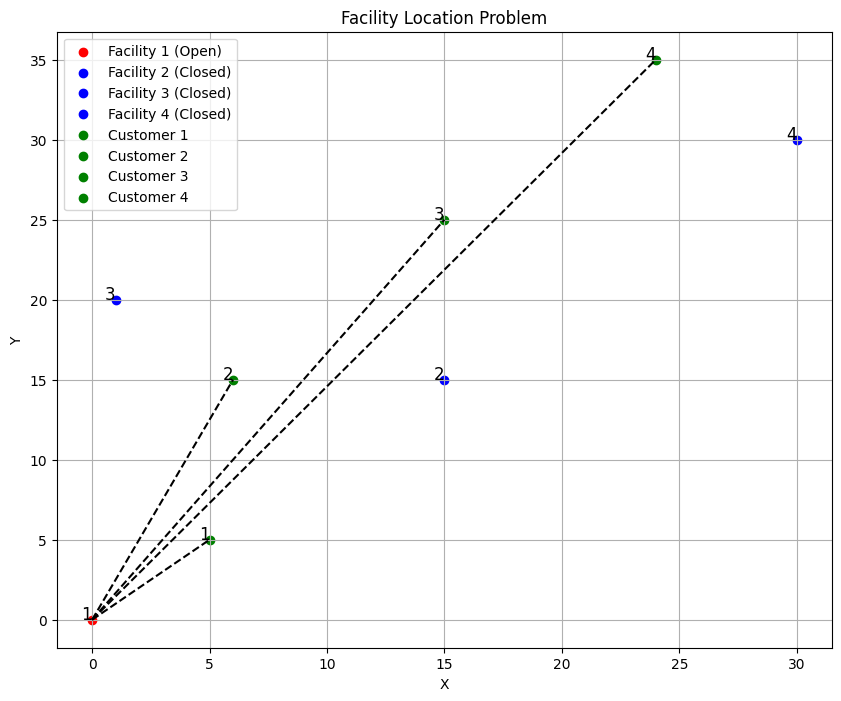

In [ ]:
import matplotlib.pyplot as plt

def plot_solution(locations, customers, assignment, opened_facilities):
    plt.figure(figsize=(10, 8))

    # Plot facilities
    for i, (x, y) in enumerate(locations):
        if opened_facilities[i] == 1:
            plt.scatter(x, y, color='red', label=f'Facility {i+1} (Open)')
        else:
            plt.scatter(x, y, color='blue', label=f'Facility {i+1} (Closed)')
        plt.text(x, y, f'{i+1}', fontsize=12, ha='right')

    # Plot customers
    for j, (x, y) in enumerate(customers):
        plt.scatter(x, y, color='green', label=f'Customer {j+1}')
        plt.text(x, y, f'{j+1}', fontsize=12, ha='right')

    # Plot connections between facilities and customers based on assignment
    for i in range(len(locations)):
        for j in range(len(customers)):
            if assignment[i][j] == 1:
                plt.plot([locations[i][0], customers[j][0]], [locations[i][1], customers[j][1]], color='black', linestyle='--')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Facility Location Problem')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
result = solve_facility_location(locations, customers, opening_costs, capacity, demand, transportation_costs, environmental_impact)
if result:
    total_cost, assignment, opened_facilities = result
    plot_solution(locations, customers, assignment, opened_facilities)
